# Explore TRI Inventory Data

This dataset covers all the TRI data for the US from 2018. I need to decide if I want to include data from other years or not.

In [1]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# read data in
df_in = pd.read_excel('../data/TRI-2018-US.xlsx')

In [3]:
# create copy of original data
df = df_in.copy()

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

df.head()

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. FEDERAL FACILITY,15. INDUSTRY SECTOR CODE,16. INDUSTRY SECTOR,17. PRIMARY SIC,18. SIC 2,19. SIC 3,20. SIC 4,21. SIC 5,22. SIC 6,23. PRIMARY NAICS,24. NAICS 2,25. NAICS 3,26. NAICS 4,27. NAICS 5,28. NAICS 6,29. DOC_CTRL_NUM,30. CHEMICAL,31. CAS #/COMPOUND ID,32. SRS ID,33. CLEAN AIR ACT CHEMICAL,34. CLASSIFICATION,35. METAL,36. METAL CATEGORY,37. CARCINOGEN,38. FORM TYPE,39. UNIT OF MEASURE,40. 5.1 - FUGITIVE AIR,41. 5.2 - STACK AIR,42. 5.3 - WATER,43. 5.4 - UNDERGROUND,44. 5.4.1 - UNDERGROUND CL I,45. 5.4.2 - UNDERGROUND C II-V,46. 5.5.1 - LANDFILLS,47. 5.5.1A - RCRA C LANDFILL,48. 5.5.1B - OTHER LANDFILLS,49. 5.5.2 - LAND TREATMENT,50. 5.5.3 - SURFACE IMPNDMNT,51. 5.5.3A - RCRA SURFACE IM,52. 5.5.3B - OTHER SURFACE I,53. 5.5.4 - OTHER DISPOSAL,54. ON-SITE RELEASE TOTAL,55. 6.1 - POTW - TRNS RLSE,56. 6.1 - POTW - TRNS TRT,57. POTW - TOTAL TRANSFERS,58. 6.2 - M10,59. 6.2 - M41,60. 6.2 - M62,61. 6.2 - M40 METAL,62. 6.2 - M61 METAL,63. 6.2 - M71,64. 6.2 - M81,65. 6.2 - M82,66. 6.2 - M72,67. 6.2 - M63,68. 6.2 - M66,69. 6.2 - M67,70. 6.2 - M64,71. 6.2 - M65,72. 6.2 - M73,73. 6.2 - M79,74. 6.2 - M90,75. 6.2 - M94,76. 6.2 - M99,77. OFF-SITE RELEASE TOTAL,78. 6.2 - M20,79. 6.2 - M24,80. 6.2 - M26,81. 6.2 - M28,82. 6.2 - M93,83. OFF-SITE RECYCLED TOTAL,84. 6.2 - M56,85. 6.2 - M92,86. OFF-SITE ENERGY RECOVERY T,87. 6.2 - M40 NON-METAL,88. 6.2 - M50,89. 6.2 - M54,90. 6.2 - M61 NON-METAL,91. 6.2 - M69,92. 6.2 - M95,93. OFF-SITE TREATED TOTAL,94. 6.2 - UNCLASSIFIED,95. 6.2 - TOTAL TRANSFER,96. TOTAL RELEASES,97. 8.1 - RELEASES,98. 8.1A - ON-SITE CONTAINED,99. 8.1B - ON-SITE OTHER,100. 8.1C - OFF-SITE CONTAIN,101. 8.1D - OFF-SITE OTHER R,102. 8.2 - ENERGY RECOVER ON,103. 8.3 - ENERGY RECOVER OF,104. 8.4 - RECYCLING ON SITE,105. 8.5 - RECYCLING OFF SIT,106. 8.6 - TREATMENT ON SITE,107. 8.7 - TREATMENT OFF SITE,108. PRODUCTION WSTE (8.1-8.7),109. 8.8 - ONE-TIME RELEASE,110. PROD_RATIO_OR_ ACTIVITY,111. 8.9 - PRODUCTION RATIO,112. PARENT CO NAME,113. PARENT CO DB NUM
0,2018,51555CRRYN1965H,110031018618,CARRY-ON TRAILER CORP,1965 HWY 30,MISSOURI VALLEY,HARRISON,IA,51555,NaN,NaN,41.550090,-95.921590,NO,336,Transportation Equipment,NaN,NaN,NaN,NaN,NaN,NaN,336212,NaN,NaN,NaN,NaN,NaN,1318217368012,CHROMIUM,7440473,150060.0,YES,TRI,YES,1,NO,R,Pounds,6.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,6.0,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,17.00,0.0,443.0,0.0,0.0,0.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,460.00,23.00,0,0.0,6.0,17.0,0.00,0.0,0.0,0.0,443.0,0.0,0.00,466.0,NaN,PRODUCTION,0.89,CARRY-ON TRAILER CORP,NaN
1,2018,33801SNJNF2302L,110000917633,AMERICAN ENVIRONMENTAL CONTAINER CORP,2302 LASSO LN,LAKELAND,POLK,FL,33801,NaN,NaN,28.017020,-81.878810,NO,326,Plastics and Rubber,NaN,NaN,NaN,NaN,NaN,NaN,326130,NaN,NaN,NaN,NaN,NaN,1318216804260,STYRENE,100425,19414.0,YES,TRI,NO,0,YES,R,Pounds,0.0,94636.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,94636.0,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,0.00,94636.00,0,0.0,94636.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,94636.0,NaN,PRODUCTION,1.08,NaN,NaN
2,2018,13165WRGRC228EA,110019173375,EVANS CHEMETICS LP,228 E MAIN ST,WATERLOO,SENECA,NY,13165,NaN,NaN,42.901943,-76.854586,NO,325,Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,325199,NaN,NaN,NaN,NaN,NaN,1318217042492,ETHYLENE GLYCOL,107211,24257.0,YES,TRI,NO,0,NO,R,Pounds,5.0,5.0,250.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,260.0,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,5.00,265.00,0,0.0,260.0,5.0,0.00,0.0,0.0,0.0,0.0,3900.0,0.00,4165.0,NaN,PRODUCTION,1.00,NaN,NaN
3,2018,23834LDNCR16101,110000342521,CHURCH & DWIGHT CO INC,1851 TOUCHSTONE RD,COLONIAL HEIGHTS,CHESTERFIELD,VA,2

After viewing a sample of the data, I can already see there is a lot of information here. A total of 113 columns, including basic info like location data, as well as facility name, industry type, and parent corporation. There are a number of columns describing the chemical released, such as the chemical itself, whether it is a carcinogen or not, the unit of measure and then amounts released by various means, both onsite and offsite. 

The EPA provides [documentation](https://www.epa.gov/sites/production/files/2019-08/documents/basic_data_files_documentation_aug_2019_v2.pdf) for reading these TRI files. There are two columns, "ON-SITE RELEASE TOTAL" and "OFF-SITE RELEASE TOTAL" that sum the different types of releases either on-site or off-site. This makes me wonder where these off-site release locations are and if that data is available. 

I think I should keep the individual on-site release columns, but can likely get rid of the individual off-site release columns, only keeping the "OFF-SITE RELEASE TOTAL" for now, since this is a geographic exploration.

In [5]:
# list all the columns
list(df.columns)

['1. YEAR',
 '2. TRIFD',
 '3. FRS ID',
 '4. FACILITY NAME',
 '5. STREET ADDRESS',
 '6. CITY',
 '7. COUNTY',
 '8. ST',
 '9. ZIP',
 '10. BIA',
 '11. TRIBE',
 '12. LATITUDE',
 '13. LONGITUDE',
 '14. FEDERAL FACILITY',
 '15. INDUSTRY SECTOR CODE',
 '16. INDUSTRY SECTOR',
 '17. PRIMARY SIC',
 '18. SIC 2',
 '19. SIC 3',
 '20. SIC 4',
 '21. SIC 5',
 '22. SIC 6',
 '23. PRIMARY NAICS',
 '24. NAICS 2',
 '25. NAICS 3',
 '26. NAICS 4',
 '27. NAICS 5',
 '28. NAICS 6',
 '29. DOC_CTRL_NUM',
 '30. CHEMICAL',
 '31. CAS #/COMPOUND ID',
 '32. SRS ID',
 '33. CLEAN AIR ACT CHEMICAL',
 '34. CLASSIFICATION',
 '35. METAL',
 '36. METAL CATEGORY',
 '37. CARCINOGEN',
 '38. FORM TYPE',
 '39. UNIT OF MEASURE',
 '40. 5.1 - FUGITIVE AIR',
 '41. 5.2 - STACK AIR',
 '42. 5.3 - WATER',
 '43. 5.4 - UNDERGROUND',
 '44. 5.4.1 - UNDERGROUND CL I',
 '45. 5.4.2 - UNDERGROUND C II-V',
 '46. 5.5.1 - LANDFILLS',
 '47. 5.5.1A - RCRA C LANDFILL',
 '48. 5.5.1B - OTHER LANDFILLS',
 '49. 5.5.2 - LAND TREATMENT',
 '50. 5.5.3 - SURFACE

In [6]:
# go ahead and drop several columns
df = df.drop(['18. SIC 2',
 '19. SIC 3',
 '20. SIC 4',
 '21. SIC 5',
 '22. SIC 6',
 '24. NAICS 2',
 '25. NAICS 3',
 '26. NAICS 4',
 '27. NAICS 5',
 '28. NAICS 6',
 '32. SRS ID',
 '38. FORM TYPE',
 '55. 6.1 - POTW - TRNS RLSE',
 '56. 6.1 - POTW - TRNS TRT',
 '57. POTW - TOTAL TRANSFERS',
 '58. 6.2 - M10',
 '59. 6.2 - M41',
 '60. 6.2 - M62',
 '61. 6.2 - M40 METAL',
 '62. 6.2 - M61 METAL',
 '63. 6.2 - M71',
 '64. 6.2 - M81',
 '65. 6.2 - M82',
 '66. 6.2 - M72',
 '67. 6.2 - M63',
 '68. 6.2 - M66',
 '69. 6.2 - M67',
 '70. 6.2 - M64',
 '71. 6.2 - M65',
 '72. 6.2 - M73',
 '73. 6.2 - M79',
 '74. 6.2 - M90',
 '75. 6.2 - M94',
 '76. 6.2 - M99',
 '78. 6.2 - M20',
 '79. 6.2 - M24',
 '80. 6.2 - M26',
 '81. 6.2 - M28',
 '82. 6.2 - M93',
 '84. 6.2 - M56',
 '85. 6.2 - M92',
 '87. 6.2 - M40 NON-METAL',
 '88. 6.2 - M50',
 '89. 6.2 - M54',
 '90. 6.2 - M61 NON-METAL',
 '91. 6.2 - M69',
 '92. 6.2 - M95'], axis=1)

In [7]:
df.sample(5)

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. FEDERAL FACILITY,15. INDUSTRY SECTOR CODE,16. INDUSTRY SECTOR,17. PRIMARY SIC,23. PRIMARY NAICS,29. DOC_CTRL_NUM,30. CHEMICAL,31. CAS #/COMPOUND ID,33. CLEAN AIR ACT CHEMICAL,34. CLASSIFICATION,35. METAL,36. METAL CATEGORY,37. CARCINOGEN,39. UNIT OF MEASURE,40. 5.1 - FUGITIVE AIR,41. 5.2 - STACK AIR,42. 5.3 - WATER,43. 5.4 - UNDERGROUND,44. 5.4.1 - UNDERGROUND CL I,45. 5.4.2 - UNDERGROUND C II-V,46. 5.5.1 - LANDFILLS,47. 5.5.1A - RCRA C LANDFILL,48. 5.5.1B - OTHER LANDFILLS,49. 5.5.2 - LAND TREATMENT,50. 5.5.3 - SURFACE IMPNDMNT,51. 5.5.3A - RCRA SURFACE IM,52. 5.5.3B - OTHER SURFACE I,53. 5.5.4 - OTHER DISPOSAL,54. ON-SITE RELEASE TOTAL,77. OFF-SITE RELEASE TOTAL,83. OFF-SITE RECYCLED TOTAL,86. OFF-SITE ENERGY RECOVERY T,93. OFF-SITE TREATED TOTAL,94. 6.2 - UNCLASSIFIED,95. 6.2 - TOTAL TRANSFER,96. TOTAL RELEASES,97. 8.1 - RELEASES,98. 8.1A - ON-SITE CONTAINED,99. 8.1B - ON-SITE OTHER,100. 8.1C - OFF-SITE CONTAIN,101. 8.1D - OFF-SITE OTHER R,102. 8.2 - ENERGY RECOVER ON,103. 8.3 - ENERGY RECOVER OF,104. 8.4 - RECYCLING ON SITE,105. 8.5 - RECYCLING OFF SIT,106. 8.6 - TREATMENT ON SITE,107. 8.7 - TREATMENT OFF SITE,108. PRODUCTION WSTE (8.1-8.7),109. 8.8 - ONE-TIME RELEASE,110. PROD_RATIO_OR_ ACTIVITY,111. 8.9 - PRODUCTION RATIO,112. PARENT CO NAME,113. PARENT CO DB NUM
5551,2018,36346STHLNRTE1C,110006795441,WAYNE FARMS LLC - ENTERPRISE FRESH PLANT,1020 COUNTY RD 114,JACK,COFFEE,AL,36346,NaN,NaN,31.500857,-85.903705,NO,311,Food,NaN,311615,1318216998878,NITRATE COMPOUNDS,N511,NO,TRI,NO,0,NO,Pounds,0.0,0.0,1340594.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1340594.0,0.0,0.0,0.0,0.0,0,0.0,1340594.0,0,0.0,1340594.0,0.0,0.0,0.0,0.0,0.0,0.0,725010.0,0.0,2065604.0,NaN,PRODUCTION,1.01,CONTINENTAL GRAIN CO,6982409
14051,2018,77253BKRLT6023N,110000462213,BAKER HUGHES INC - NAVIGATION,6023 NAVIGATION BLVD,HOUSTON,HARRIS,TX,77011,NaN,NaN,29.747200,-95.312700,NO,333,Machinery,NaN,333132,1318216920227,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,35928.0,0.0,0.0,0,35928.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35928.0,0.0,0.0,35928.0,NaN,ACTIVITY,1.90,BAKER HUGHES A GE CO LLC,174987909
8500,2018,15066CRMCC13THS,110000583020,CERAMIC COLOR & CHEMICAL MANUFACTURING CO,13TH ST & 11TH AVE,NEW BRIGHTON,BEAVER,PA,15066,NaN,NaN,40.731177,-80.303118,NO,4246,Chemical Wholesalers,NaN,424690,1318217002548,VANADIUM COMPOUNDS,N770,NO,TRI,YES,1,NO,Pounds,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.00,NaN,NaN
65126,2018,75050SMNSN501FO,110005174435,SIEMENS INDUSTRY INC,501 FOUNTAIN PKWY.,GRAND PRAIRIE,TARRANT,TX,75050,NaN,NaN,32.778980,-97.059670,NO,335,Electrical Equipment,NaN,335313,1318216752321,COPPER,7440508,NO,TRI,YES,1,NO,Pounds,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,973000.0,0.0,0.0,0.0,0,973000.0,973000.0,0,0.0,0.0,0.0,973000.0,0.0,0.0,0.0,0.0,0.0,0.0,973000.0,NaN,PRODUCTION,1.00,SIEMENS CORP,64995533
50795,2018,07077SHLLL111ST,110000319012,SEWAREN TERMINAL,111 STATE ST,SEWAREN,MIDDLESEX,NJ,7077,NaN,NaN,40.541944,-74.254722,NO,4247,Petroleum Bulk Terminals,NaN,424710,1318217023973,CUMENE,98828,YES,TRI,NO,0,YES,Pounds,34.0,122.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,156.0,0.0,2.0,0.0,0.0,0,2.0,156.0,0,0.0,156.0,0.0,0.0,0.0,0.0,0.0,2.0,221.0,0.0,379.0,0.0,PRODUCTION,1.12,SHELL OIL PRODUCTS US,4294737


In [8]:
# remove leading numbers, periods, and space and from column names
df.columns = df.columns.str.lstrip('0123456789.- ')

In [9]:
# looking at the chemical field to see all unique types
df['CHEMICAL'].unique()

array(['CHROMIUM', 'STYRENE', 'ETHYLENE GLYCOL', 'AMMONIA',
       '1,2,4-TRIMETHYLBENZENE', 'N-METHYL-2-PYRROLIDONE', 'LEAD',
       'MANGANESE COMPOUNDS', 'XYLENE (MIXED ISOMERS)', 'FORMALDEHYDE',
       'LEAD  and LEAD COMPOUNDS', 'POLYCYCLIC AROMATIC COMPOUNDS',
       'NITRATE COMPOUNDS',
       'CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED IN THE TRANSVAAL REGION)',
       'TOLUENE', 'PHENOL', 'SODIUM NITRITE', 'CHLORINE',
       'CERTAIN GLYCOL ETHERS', 'HYDROGEN SULFIDE', 'NICKEL', 'COPPER',
       'MANGANESE', 'SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"',
       'ACETONITRILE', 'ARSENIC  and ARSENIC COMPOUNDS', 'NITRIC ACID',
       'DI(2-ETHYLHEXYL) PHTHALATE', 'BARIUM COMPOUNDS',
       'CRESOL (MIXED ISOMERS)', 'DIOXIN AND DIOXIN-LIKE COMPOUNDS',
       'ARSENIC COMPOUNDS', 'BENZO(G,H,I)PERYLENE', 'N-BUTYL ALCOHOL',
       'ACETALDEHYDE', 'COBALT COMPOUNDS',
       'HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS" ONLY)"',
       'DIISOCYANATES', 'BARIUM  and BARIU

In [10]:
# there are 505 unique chemicals reported in this dataset
df['CHEMICAL'].nunique()

505

In [11]:
# what are the most common chemicals reported?
df['CHEMICAL'].value_counts()

LEAD                                  4124
ZINC COMPOUNDS                        3047
NICKEL                                2528
CHROMIUM                              2464
COPPER                                2444
                                      ... 
BIS(2-CHLOROETHOXY)METHANE            1   
N-NITROSODIETHYLAMINE                 1   
1,1-DICHLORO-1-FLUOROETHANE           1   
1,2-DICHLORO-1,1,2-TRIFLUOROETHANE    1   
DICHLOROFLUOROMETHANE                 1   
Name: CHEMICAL, Length: 505, dtype: int64

In [12]:
# there is a classification attribute that each chemical falls under
df['CLASSIFICATION'].unique()

array(['TRI', 'PBT', 'Dioxin'], dtype=object)

According to the dataset documentation,
- TRI: General EPCRA Section 313 Chemical
- PBT: Persistent Bioaccumulative and Toxic
- DIOXIN: Dioxin or Dioxin-like compound 

The classification determines the unit of measure, DIOXINs are measured in grams and others are measured in pounds.

In [13]:
# inspect the different units of measure
df['UNIT OF MEASURE'].unique()

array(['Pounds', 'Grams'], dtype=object)

In [14]:
# the data also tells whether or not the chemical is a carcinogen
df['CARCINOGEN'].unique()

array(['NO', 'YES'], dtype=object)

I'm going to split the data based on release measurement units to inspect the on- and off-site release totals.

In [15]:
dioxins = df[(df['CLASSIFICATION'] == 'Dioxin')]
all_others = df[(df['CLASSIFICATION'] == 'TRI') | (df['CLASSIFICATION'] == 'PBT')]

In [16]:
# there are 886 facilities that release dixoins
dioxins.shape[0]

886

In [17]:
# there are 78,601 facilities that release other chemicals measured in pounds
all_others.shape[0]

78601

In [18]:
# looking at stats for dioxin-releasing facilities
print('ON-SITE RELEASE TOTAL: GRAMS')
print(dioxins['ON-SITE RELEASE TOTAL'].describe())
print('OFF-SITE RELEASE TOTAL: GRAMS')
print(dioxins['OFF-SITE RELEASE TOTAL'].describe())

ON-SITE RELEASE TOTAL: GRAMS
count    886.000000  
mean     35.038179   
std      547.556632  
min      0.000000    
25%      0.156051    
50%      0.464900    
75%      1.303395    
max      14058.176500
Name: ON-SITE RELEASE TOTAL, dtype: float64
OFF-SITE RELEASE TOTAL: GRAMS
count    886.000000  
mean     73.282484   
std      1436.259542 
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      35475.903630
Name: OFF-SITE RELEASE TOTAL, dtype: float64


In [19]:
# looking at stats for facilities measuring releases in pounds
print('ON-SITE RELEASE TOTAL: POUNDS')
print(all_others['ON-SITE RELEASE TOTAL'].describe())
print('OFF-SITE RELEASE TOTAL: POUNDS')
print(all_others['OFF-SITE RELEASE TOTAL'].describe())

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

ON-SITE RELEASE TOTAL: POUNDS
count    7.860100e+04
mean     4.286522e+04
std      2.353745e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.872000e+01
75%      1.096000e+03
max      4.904514e+08
Name: ON-SITE RELEASE TOTAL, dtype: float64
OFF-SITE RELEASE TOTAL: POUNDS
count    7.860100e+04
mean     6.054216e+03
std      1.047185e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.150000e+00
max      1.510000e+07
Name: OFF-SITE RELEASE TOTAL, dtype: float64


This dataset contains a lot of information, but there are many other factors to consider as well. For instance, different chemicals have different toxicity levels, so comparing amounts of chemicals across the board is irrelevant and would be misleading. There is a document on the TRI website that will be useful when wrangling this dataset, [Factors to Consider when using Toxic Release Inventory Data](https://www.epa.gov/sites/production/files/2019-03/documents/factors_to_consider_march_2019.pdf). This document makes the note that method of release is a significant factor to consider when evaluating environmental hazard because some methods are more tightly controlled and have a smaller chance of migration 'beyond the fenceline' than others.

According to the document, some factors to Consider in using TRI data for exposure and risk analysis are:
- Toxicity of the Chemical
- Exposure Considerations
- Bioconcentration of the Chemical in the Food Chain
- Type of Disposal or Release (Environmental Medium)
- Type of Off-Site Facility Receiving the Chemical and the Efficiency of its Waste Management Practices
- On-Site Waste Management of the Toxic Chemical

In [20]:
# what industries are involved
df['INDUSTRY SECTOR'].value_counts()

Chemicals                            18306
Fabricated Metals                    8146 
Primary Metals                       5881 
Petroleum                            5651 
Nonmetallic Mineral Product          4711 
Transportation Equipment             4400 
Electric Utilities                   4397 
Petroleum Bulk Terminals             4021 
Food                                 3771 
Machinery                            2785 
Hazardous Waste                      2591 
Paper                                2452 
Plastics and Rubber                  2423 
Chemical Wholesalers                 2254 
Wood Products                        1423 
Other                                1346 
Computers and Electronic Products    1317 
Electrical Equipment                 1232 
Metal Mining                         662  
Miscellaneous Manufacturing          575  
Furniture                            383  
Printing                             212  
Textiles                             176  
Beverages  

In [21]:
# there are 79,487 records in the dataset
df.shape[0]

79487

In [22]:
# there are only 21,557 unique TRIDs in the dataset
df['TRIFD'].nunique()

21557

What does this mean? Each record in the dataset corresponds to a chemical that is released, so there are multiple entries for the same facility if the facility releases more than one chemical monitored by the TRI.

If I go with a storymap format for this project, I am thinking of going two directins with this TRI data. First, I can show all locations of each facility with all chemicals released from each one. Then in a later section I could narrow down the data, taking into account a specific chemical released and diving further into that.

## Isolate TRI facilities

In [23]:
df.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM
0,2018,51555CRRYN1965H,110031018618,CARRY-ON TRAILER CORP,1965 HWY 30,MISSOURI VALLEY,HARRISON,IA,51555,nan,NaN,41.55009,-95.92159,NO,336,Transportation Equipment,nan,336212,1318217368012,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,6.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.00000,17.00000,443.00000,0.00000,0.00000,0,460.00000,23.00000,0,0.00000,6.00000,17.00000,0.00000,0.00000,0.00000,0.00000,443.00000,0.00000,0.00000,466.00000,nan,PRODUCTION,0.89000,CARRY-ON TRAILER CORP,NaN
1,2018,33801SNJNF2302L,110000917633,AMERICAN ENVIRONMENTAL CONTAINER CORP,2302 LASSO LN,LAKELAND,POLK,FL,33801,nan,NaN,28.01702,-81.87881,NO,326,Plastics and Rubber,nan,326130,1318216804260,STYRENE,100425,YES,TRI,NO,0,YES,Pounds,0.00000,94636.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,94636.00000,0,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,94636.00000,nan,PRODUCTION,1.08000,NaN,NaN
2,2018,13165WRGRC228EA,110019173375,EVANS CHEMETICS LP,228 E MAIN ST,WATERLOO,SENECA,NY,13165,nan,NaN,42.90194,-76.85459,NO,325,Chemicals,nan,325199,1318217042492,ETHYLENE GLYCOL,107211,YES,TRI,NO,0,NO,Pounds,5.00000,5.00000,250.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,260.00000,5.00000,0.00000,0.00000,0.00000,0,5.00000,265.00000,0,0.00000,260.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3900.00000,0.00000,4165.00000,nan,PRODUCTION,1.00000,NaN,NaN
3,2018,23834LDNCR16101,110000342521,CHURCH & DWIGHT CO INC,1851 TOUCHSTONE RD,COLONIAL HEIGHTS,CHESTERFIELD,VA,23834,nan,NaN,37.30143,-77.38169,NO,326,Plastics and Rubber,nan,326299,1318216776450,AMMONIA,7664417,NO,TRI,NO,0,NO,Pounds,14015.00000,257613.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,271628.00000,347.04000,0.00000,0.00000,520.56000,0,520.56000,271975.04000,0,0.00000,271628.00000,0.00000,347.04000,0.00000,0.00000,0.00000,0.00000,0.00000,520.56000,272495.60000,nan,PRODUCTION,0.92000,CHURCH & DWIGHT CO INC,1211952
4,2018,45374HBRTCWORLD,110004596795,HOBART PLANT 27,750 LINCOLN AVE,TROY,MIAMI,OH,45373,nan,NaN,40.03394,-84.21128,NO,333,Machinery,nan,333241,1318217089895,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,0.00000,49.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,49.00000,0.00000,60188.00000,0.00000,0.00000,0,60188.00000,49.00000,0,0.00000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,60188.00000,0.00000,0.00000,60237.00000,nan,PRODUCTION,1.57000,ILLINOIS TOOL WORKS INC,NaN


In [24]:
# combine categorized release methods into total air and land release methods
# water release is already in a single column
air_column = df["FUGITIVE AIR"] + df["STACK AIR"]
df["AIR_RELEASE"] = air_column

land_column = df["UNDERGROUND CL I"] + df["UNDERGROUND C II-V"] + df["A - RCRA C LANDFILL"] + df["B - OTHER LANDFILLS"] + df["LAND TREATMENT"] + df["A - RCRA SURFACE IM"] + df["B - OTHER SURFACE I"] + df["OTHER DISPOSAL"]
df["LAND_RELEASE"] = land_column

#rename water column
df = df.rename(columns={'WATER': 'WATER_RELEASE'})

df.sample(5)

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE
78236,2018,2415WQLCHM51BRA,110070239250,QUALICHEM INC PLANT 2,510 BRANCH DR,SALEM,SALEM (CITY),VA,24153,nan,NaN,37.30475,-80.03103,NO,325,Chemicals,nan,325998,1318216907840,SODIUM NITRITE,7632000,NO,TRI,NO,2,NO,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,NaN,NaN,0.00000,0.00000
26428,2018,72206PRCLC10000,110001711568,POROCEL INDUSTRIES LLC,10300 ARCH ST PIKE,LITTLE ROCK,PULASKI,AR,72206,nan,NaN,34.65425,-92.30819,NO,325,Chemicals,nan,325180,1318217334465,ARSENIC and ARSENIC COMPOUNDS,N020,YES,TRI,YES,1,NO,Pounds,0.00000,3.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,3.00000,43.00000,0.00000,0.00000,0.00000,0,26.00000,46.00000,0,0.00000,3.00000,26.00000,17.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,46.00000,nan,PRODUCTION,1.32000,NaN,NaN,3.00000,0.00000
45003,2018,81625TRPPR65MIL,110008302522,TRAPPER MINING INC,"6.5 MILES SW OF CRAIG, LOCATED OFF STATE HWY 13",CRAIG,MOFFAT,CO,81625,nan,NaN,40.41722,-107.58472,NO,2121,Coal Mining,nan,212111,1318217212125,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED IN THE TRANSVAAL REGION),N090,YES,TRI,YES,1,NO,Pounds,15.00000,0.00000,2.73000,0,0.00000,0.00000,0,0.00000,11400.00000,0.00000,0,0.00000,45.00000,0.00000,11462.73000,0.00000,0.00000,0.00000,0.00000,0,0.00000,11462.73000,0,11400.00000,62.73000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11462.73000,nan,ACTIVITY,0.86000,NaN,NaN,15.00000,11445.00000
60492,2018,32087WRMLNONEWI,110000361625,INSTEEL WIRE PRODUCTS,ONE WIRE MILL RD,SANDERSON,BAKER,FL,32087,nan,NaN,30.24519,-82.26405,NO,331,Primary Metals,nan,331222,1318217019672,ZINC COMPOUNDS,N982,NO,TRI,YES,1,NO,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,4060.00000,0.00000,0.00000,0.00000,0,4060.00000,4060.00000,0,0.00000,0.00000,4060.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4060.00000,nan,ACTIVITY,0.90000,INSTEEL INDUSTRIES INC,3220225,0.00000,0.00000
1785,2018,49022GSTMN2300H,110000593206,GAST MANUFACTURING INC,2300 HWY M-139,BENTON HARBOR,BERRIEN,MI,49022,nan,NaN,42.07625,-86.43656,NO,333,Machinery,nan,333912,1318216927970,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,32199.00000,0.00000,0.00000,0,32199.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32199.00000,0.00000,0.00000,32199.00000,nan,PRODUCTION,1.10000,IDEX CORP,183580844,0.00000,0.00000


In [25]:
# create land release column that excludes RCRA Subtitle C Landfills and Class I Underground Injection Wells
# these 2 options are more tightly controlled and have a much lower probabilty of exposure
# so this category will help isolate facilities that have a higher change of migrating beyond fence line
land_filter_column = df["UNDERGROUND C II-V"] + df["B - OTHER LANDFILLS"] + df["LAND TREATMENT"] + df["A - RCRA SURFACE IM"] + df["B - OTHER SURFACE I"] + df["OTHER DISPOSAL"]
df["LAND_RELEASE_EXCLUDED"] = land_filter_column
df.sample(5)

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED
31710,2018,67219KCNDS55MIL,110016757543,KICE INDUSTRIES INC,5500 MILL HEIGHTS DR,WICHITA,SEDGWICK,KS,67219,nan,NaN,37.78234,-97.32103,NO,333,Machinery,nan,333415,1318216760316,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,10.63000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,10.63000,0.01200,41274.19000,0.00000,0.00000,0,41274.19000,10.64200,0,0.00000,10.63000,0.00000,0.00000,0.00000,0.00000,0.00000,41274.19000,0.00000,0.00000,41284.82000,nan,PRODUCTION,1.07000,KICE INDUSTRIES INC,NaN,10.63000,0.00000,0.00000
24738,2018,98373BCGFB18001,110015575215,BOEING COMMERCIAL AIRPLANES-FREDERICKSON,18001 CANYON RD E,PUYALLUP,PIERCE,WA,98375,nan,NaN,47.08655,-122.34685,NO,336,Transportation Equipment,nan,336411,1318217021955,NITRIC ACID,7697372,NO,TRI,NO,0,NO,Pounds,250.00000,78.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,328.00000,0.00000,0.00000,0.00000,366859.00000,0,366859.00000,328.00000,0,0.00000,328.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,17750.00000,366859.00000,384937.00000,nan,PRODUCTION,1.05000,THE BOEING CO,9256819,328.00000,0.00000,0.00000
68198,2018,70069DPNTPHIGHW,110000597131,DUPONT PONTCHARTRAIN WORKS,586 HWY 44,LA PLACE,ST JOHN THE BAPTIST PARIS,LA,70068,nan,NaN,30.05890,-90.52410,NO,325,Chemicals,nan,325199,1318217249010,PHENOL,108952,YES,TRI,NO,0,NO,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,PRODUCTION,1.10000,E I DU PONT DE NEMOURS & CO,1315704,0.00000,0.00000,0.00000
64797,2018,16365NTDRFPOBOX,110043815690,UNITED REFINING CO,15 BRADLEY ST,WARREN,WARREN,PA,16365,nan,NaN,41.82949,-79.12468,NO,324,Petroleum,nan,324110,1318217327535,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.00000,0.01240,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.01240,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.01240,0,0.00000,0.01240,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01240,nan,PRODUCTION,0.92000,UNITED REFINING CO,118331149,0.01240,0.00000,0.00000
58316,2018,9288WRWLYL2665R,110069321077,RW LYALL & CO INC,2665 RESEARCH DR,CORONA,RIVERSIDE,CA,92882,nan,NaN,33.88332,-117.62023,NO,332,Fabricated Metals,nan,332996,1318217296983,MANGANESE,7439965,YES,TRI,YES,1,NO,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,1525.04000,0.00000,0.00000,0,1525.04000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1525.04000,0.00000,0.00000,1525.04000,nan,PRODUCTION,1.44000,HUBBELL INC,1181858,0.00000,0.00000,0.00000


### Filter TRI facilties by chemical classifications to begin calculating various release total columns that will later be joined to each facility location

In [26]:
# isolate dioxins because these are measured in grams
dioxins = df[(df['CLASSIFICATION'] == 'Dioxin')]
dioxins.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED
42,2018,56649BSCSCSECON,110000427501,BOISE WHITE PAPER LLC,400 SECOND ST,INTERNATIONAL FALLS,KOOCHICHING,MN,56649,nan,NaN,48.60546,-93.40670,NO,322,Paper,nan,322121,1318216984120,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.00000,0.16060,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.16060,0.32460,0.00000,0.00000,0.00000,0,0.32460,0.48520,0,0.00000,0.16060,0.32460,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.48520,nan,PRODUCTION,1.04000,PACKAGING CORP OF AMERICA,60047151,0.16060,0.00000,0.00000
50,2018,32333CSTLLHIGHW,110000588668,COASTAL FOREST RESOURCES CO,8007 GA FL HWY,HAVANA,GADSDEN,FL,32333,nan,NaN,30.65755,-84.41582,NO,321,Wood Products,nan,321212,1318216913715,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.00000,0.22390,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.22390,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.22390,0,0.00000,0.22390,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.22390,nan,PRODUCTION,1.00000,NaN,NaN,0.22390,0.00000,0.00000
124,2018,70047TRNSM14902,110000448659,VALERO REFINING - NEW ORLEANS LLC,14902 RIVER RD,NORCO,ST CHARLES PARISH,LA,70079,nan,NaN,29.98528,-90.39278,NO,324,Petroleum,nan,324110,1318217173830,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.00000,0.29780,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.29780,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.29780,0,0.00000,0.29780,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.29780,nan,PRODUCTION,0.91000,VALERO ENERGY CORP,NaN,0.29780,0.00000,0.00000
176,2018,32347BCKYCROUTE,110056962381,FOLEY CELLULOSE LLC,1 BUCKEYE DR,PERRY,TAYLOR,FL,32348,nan,NaN,30.06869,-83.52375,NO,322,Paper,nan,322110,1318217570492,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.00000,0.58360,0.09630,0,0.00000,0.00000,0,0.00000,2.40962,0.00000,0,0.00000,0.00000,0.00000,3.08952,0.00000,0.00000,0.00000,0.00000,0,0.00000,3.08952,0,2.40962,0.67990,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.08952,nan,PRODUCTION,0.91000,KOCH INDUSTRIES INC,6944334,0.58360,2.40962,2.40962
276,2018,58523NTLPV294CO,110000428369,BASIN ELECTRIC ANTELOPE VALLEY STATION,294 COUNTY 15,BEULAH,MERCER,ND,585239475,nan,NaN,47.37044,-101.83804,NO,2211,Electric Utilities,nan,221112,1318217378165,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.00566,8.40128,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,8.40694,0.00000,0.00000,0.00000,0.00000,0,0.00000,8.40694,0,0.00000,8.40694,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.40694,nan,PRODUCTION,0.97000,BASIN ELECTRIC,NaN,8.40694,0.00000,0.00000


In [27]:
# check values of columns
# all dixoins are carcinogens, and are listed underneath the same chemical name, and are not metals
print(dioxins['METAL'].unique())
print(dioxins['CHEMICAL'].unique())
print(dioxins['CARCINOGEN'].unique())

['NO']
['DIOXIN AND DIOXIN-LIKE COMPOUNDS']
['YES']


In [28]:
dioxins = dioxins.fillna('').groupby('TRIFD').agg({
#                              'FACILITY NAME':'first',
#                              'STREET ADDRESS':'first',
#                              'CITY':'first',
#                              'COUNTY':'first',
#                              'ST':'first',
#                              'ZIP':'first',
#                              'BIA':'first',
#                              'TRIBE':'first',
#                              'LATITUDE':'first',
#                              'LONGITUDE':'first',
#                              'FEDERAL FACILITY':'first',
#                              'INDUSTRY SECTOR':'first',
#                              'CHEMICAL': 'first', # all dioxins listed as 'DIOXIN AND DIOXIN_LIKE COMPOUNDS'
#                              'CARCINOGEN': 'first', # all dioxins are carcinogens
#                              'CLASSIFICATION':'first',
#                              'METAL':'first', # all dioxins are non-metals
#                              'UNIT OF MEASURE':'first',
                             'WATER_RELEASE':'sum',
                             'AIR_RELEASE':'sum',
                             'LAND_RELEASE':'sum',
                             'LAND_RELEASE_EXCLUDED':'sum',
                             'ON-SITE RELEASE TOTAL':'sum',
                             'OFF-SITE RELEASE TOTAL':'sum',
                             'TOTAL RELEASES':'sum'
                                               }).reset_index()

dioxins.sample(10)

,TRIFD,WATER_RELEASE,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,TOTAL RELEASES
823,95014KSRCMNAXXX,0.00000,0.03606,0.00000,0.00000,0.03606,0.00000,0.03606
334,42348WLLMTPOBOX,0.00000,0.60749,0.00000,0.00000,0.60749,0.00000,0.60749
598,70427GYLRD4THST,0.00000,0.63410,0.00000,0.00000,0.63410,0.00000,0.63410
572,67215VLCNC6200S,0.00000,0.00000,0.00000,0.00000,0.00000,0.00242,0.00242
106,26155MBYCRSTATE,0.00000,0.02348,0.00000,0.00000,0.02348,0.00000,0.02348
108,26164PCHNYROUTE,0.00000,0.35000,0.00000,0.00000,0.35000,0.00000,0.35000
799,89883GRYMN15MIL,0.00000,0.17200,0.00000,0.00000,0.17200,0.00000,0.17200
295,38901NWSPRPAPER,0.00000,0.01840,0.00000,0.00000,0.01840,0.01880,0.03720
238,35660LBMRCFORDR,0.00000,0.57590,0.00000,0.00000,0.57590,0.00000,0.57590
489,5579WVRGNP6182N,0.00000,1.03999,0.00000,0.00000,1.03999,0.00000,1.03999


In [29]:
# rename categories to reflect measurement in grams
dioxins = dioxins.rename(columns={'WATER_RELEASE': 'WATER_RELEASE_GRAMS',
                                 'AIR_RELEASE': 'AIR_RELEASE_GRAMS',
                                 'LAND_RELEASE': 'LAND_RELEASE_GRAMS',
                                 'LAND_RELEASE_EXCLUDED': 'LAND_RELEASE_EXCLUDED_GRAMS',
                                 'ON-SITE RELEASE TOTAL': 'ON_SITE_RELEASE_TOTAL_GRAMS',
                                 'OFF-SITE RELEASE TOTAL': 'OFF_SITE_RELEASE_TOTAL_GRAMS',
                                 'TOTAL RELEASES': 'TOTAL_RELEASES_GRAMS'})
dioxins.sample(5)

,TRIFD,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS
491,56537TTRTL1012W,0.00000,0.11250,0.00000,0.00000,0.11250,0.00000,0.11250
793,88210NVJRF501EA,0.00000,0.60000,0.00000,0.00000,0.60000,0.00000,0.60000
776,84624NTRMN850BR,0.00000,1.36300,4.69700,4.69700,6.06000,0.00000,6.06000
93,2442WNGVTY958ER,0.00000,0.02012,0.00000,0.00000,0.02012,0.00000,0.02012
169,30119CPPRDCENTR,0.00000,2.06000,0.00000,0.00000,2.06000,0.00000,2.06000


In [30]:
# now isolate all non-dioxin chemicals that are measured in pounds
others = df[(df['CLASSIFICATION'] == 'TRI') | (df['CLASSIFICATION'] == 'PBT')]
others.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED
0,2018,51555CRRYN1965H,110031018618,CARRY-ON TRAILER CORP,1965 HWY 30,MISSOURI VALLEY,HARRISON,IA,51555,nan,NaN,41.55009,-95.92159,NO,336,Transportation Equipment,nan,336212,1318217368012,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,6.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.00000,17.00000,443.00000,0.00000,0.00000,0,460.00000,23.00000,0,0.00000,6.00000,17.00000,0.00000,0.00000,0.00000,0.00000,443.00000,0.00000,0.00000,466.00000,nan,PRODUCTION,0.89000,CARRY-ON TRAILER CORP,NaN,6.00000,0.00000,0.00000
1,2018,33801SNJNF2302L,110000917633,AMERICAN ENVIRONMENTAL CONTAINER CORP,2302 LASSO LN,LAKELAND,POLK,FL,33801,nan,NaN,28.01702,-81.87881,NO,326,Plastics and Rubber,nan,326130,1318216804260,STYRENE,100425,YES,TRI,NO,0,YES,Pounds,0.00000,94636.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,94636.00000,0,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,94636.00000,nan,PRODUCTION,1.08000,NaN,NaN,94636.00000,0.00000,0.00000
2,2018,13165WRGRC228EA,110019173375,EVANS CHEMETICS LP,228 E MAIN ST,WATERLOO,SENECA,NY,13165,nan,NaN,42.90194,-76.85459,NO,325,Chemicals,nan,325199,1318217042492,ETHYLENE GLYCOL,107211,YES,TRI,NO,0,NO,Pounds,5.00000,5.00000,250.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,260.00000,5.00000,0.00000,0.00000,0.00000,0,5.00000,265.00000,0,0.00000,260.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3900.00000,0.00000,4165.00000,nan,PRODUCTION,1.00000,NaN,NaN,10.00000,0.00000,0.00000
3,2018,23834LDNCR16101,110000342521,CHURCH & DWIGHT CO INC,1851 TOUCHSTONE RD,COLONIAL HEIGHTS,CHESTERFIELD,VA,23834,nan,NaN,37.30143,-77.38169,NO,326,Plastics and Rubber,nan,326299,1318216776450,AMMONIA,7664417,NO,TRI,NO,0,NO,Pounds,14015.00000,257613.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,271628.00000,347.04000,0.00000,0.00000,520.56000,0,520.56000,271975.04000,0,0.00000,271628.00000,0.00000,347.04000,0.00000,0.00000,0.00000,0.00000,0.00000,520.56000,272495.60000,nan,PRODUCTION,0.92000,CHURCH & DWIGHT CO INC,1211952,271628.00000,0.00000,0.00000
4,2018,45374HBRTCWORLD,110004596795,HOBART PLANT 27,750 LINCOLN AVE,TROY,MIAMI,OH,45373,nan,NaN,40.03394,-84.21128,NO,333,Machinery,nan,333241,1318217089895,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,0.00000,49.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,49.00000,0.00000,60188.00000,0.00000,0.00000,0,60188.00000,49.00000,0,0.00000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,60188.00000,0.00000,0.00000,60237.00000,nan,PRODUCTION,1.57000,ILLINOIS TOOL WORKS INC,NaN,49.00000,0.00000,0.00000


In [31]:
others = others.fillna('').groupby('TRIFD').agg({
#                              'FACILITY NAME':'first',
#                              'STREET ADDRESS':'first',
#                              'CITY':'first',
#                              'COUNTY':'first',
#                              'ST':'first',
#                              'ZIP':'first',
#                              'BIA':'first',
#                              'TRIBE':'first',
#                              'LATITUDE':'first',
#                              'LONGITUDE':'first',
#                              'FEDERAL FACILITY':'first',
#                              'INDUSTRY SECTOR':'first',
#                              'CHEMICAL': ', '.join,
#                              'UNIT OF MEASURE':'first',
                             'WATER_RELEASE':'sum',
                             'AIR_RELEASE':'sum',
                             'LAND_RELEASE':'sum',
                             'LAND_RELEASE_EXCLUDED':'sum',
                             'ON-SITE RELEASE TOTAL':'sum',
                             'OFF-SITE RELEASE TOTAL':'sum',
                             'TOTAL RELEASES':'sum'
                                               }).reset_index()

others.sample(5)

,TRIFD,WATER_RELEASE,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,TOTAL RELEASES
4529,28352DWRDS195LD,0.00000,2.15000,0.00000,0.00000,2.15000,0.00000,2.15000
16424,7302WCSTLC22WWA,0.00000,455.00000,0.00000,0.00000,455.00000,0.00000,455.00000
8880,44004PLSTP4736K,0.00000,56036.00000,0.00000,0.00000,56036.00000,0.00000,56036.00000
15747,70129RPRDC14700,440.00000,5711.00000,2175.00000,2175.00000,8326.00000,0.00000,8326.00000
9384,44705THKRL442LU,0.00000,0.00000,0.00000,0.00000,0.00000,796.19000,796.19000


In [32]:
# rename categories to reflect measurement in pounds
others = others.rename(columns={'WATER_RELEASE': 'WATER_RELEASE_LBS',
                                 'AIR_RELEASE': 'AIR_RELEASE_LBS',
                                 'LAND_RELEASE': 'LAND_RELEASE_LBS',
                                 'LAND_RELEASE_EXCLUDED': 'LAND_RELEASE_EXCLUDED_LBS',
                                 'ON-SITE RELEASE TOTAL': 'ON_SITE_RELEASE_TOTAL_LBS',
                                 'OFF-SITE RELEASE TOTAL': 'OFF_SITE_RELEASE_TOTAL_LBS',
                                 'TOTAL RELEASES': 'TOTAL_RELEASES_LBS'})
others.sample(5)

,TRIFD,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS
16701,74147BRNRD12NPE,0.00000,506.00000,0.00000,0.00000,506.00000,0.00000,506.00000
11306,49221NXTDS1571W,0.00000,2817.00000,0.00000,0.00000,2817.00000,65754.88000,68571.88000
786,05468WYTHNGEORG,730.87000,0.00000,0.00000,0.00000,730.87000,0.00000,730.87000
6045,32209WHTWV2262W,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8560,42701MBRKC300RI,0.00000,1765.00000,0.00000,0.00000,1765.00000,123795.00000,125560.00000


In [33]:
# now isolate PBTs to calculate release totals for PBTs
pbt = df[(df['CLASSIFICATION'] == 'PBT')]
pbt.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED
7,2018,54107KRGRN204WS,110002121490,KI,204 W S ST,BONDUEL,SHAWANO,WI,54107,nan,NaN,44.73465,-88.44762,NO,337,Furniture,nan,337127,1318217301288,LEAD,7439921,YES,PBT,YES,1,YES,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,634.00000,0.00000,0.00000,0,634.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,634.00000,0.00000,0.00000,634.00000,nan,PRODUCTION,1.02000,KRUEGER INTERNATIONAL,32672651,0.00000,0.00000,0.00000
11,2018,08066JHNSN2001A,110000321125,JOHNSON MATTHEY,2001 NOLTE DR,WEST DEPTFORD,GLOUCESTER,NJ,8066,nan,NaN,39.81925,-75.20450,NO,331,Primary Metals,nan,331492,1318217219500,LEAD and LEAD COMPOUNDS,N420,YES,PBT,YES,1,NO,Pounds,0.00000,43.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,43.00000,146.60000,14880.00000,0.00000,0.00000,0,14884.60000,189.60000,0,0.00000,43.00000,0.00000,146.60000,0.00000,0.00000,0.00000,14880.00000,0.00000,0.00000,15069.60000,nan,ACTIVITY,1.09000,JOHNSON MATTHEY US 2 LLC,125348883,43.00000,0.00000,0.00000
13,2018,70079CCRBN81PRS,110022810449,RAIN CII CARBON LLC,801 PROSPECT AVE,NORCO,ST CHARLES PARISH,LA,70079,nan,NaN,30.00215,-90.39702,NO,324,Petroleum,nan,324199,1318216882365,POLYCYCLIC AROMATIC COMPOUNDS,N590,YES,PBT,NO,0,YES,Pounds,0.25000,0.11000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.36000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.36000,0,0.00000,0.36000,0.00000,0.00000,11784.30000,0.00000,0.00000,0.00000,0.00000,0.00000,11784.66000,nan,PRODUCTION,0.90000,RAIN CII CARBON LLC,198251886,0.36000,0.00000,0.00000
32,2018,60090CMMRC1444S,110002345533,DESTACO INDUSTRIAL MOTION CONTROL LLC,1444 S WOLF RD,WHEELING,COOK,IL,60090,nan,NaN,42.10599,-87.91117,NO,333,Machinery,nan,333517,1318216847855,LEAD,7439921,YES,PBT,YES,1,YES,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,106.00000,0.00000,0.00000,0,106.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,106.00000,0.00000,0.00000,106.00000,nan,PRODUCTION,1.00000,DOVER CORP,3245271,0.00000,0.00000,0.00000
48,2018,07036CTGPT4801S,110000318424,CITGO PETROLEUM CORP,4801 S WOOD AVE,LINDEN,UNION,NJ,7036,nan,NaN,40.60092,-74.20952,NO,4247,Petroleum Bulk Terminals,nan,424710,1318217196791,"BENZO(G,H,I)PERYLENE",191242,YES,PBT,NO,0,NO,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,PRODUCTION,0.82000,CITGO HOLDING INC,858706773,0.00000,0.00000,0.00000


In [34]:
pbt = pbt.fillna('').groupby('TRIFD').agg({
#                              'FACILITY NAME':'first',
#                              'STREET ADDRESS':'first',
#                              'CITY':'first',
#                              'COUNTY':'first',
#                              'ST':'first',
#                              'ZIP':'first',
#                              'BIA':'first',
#                              'TRIBE':'first',
#                              'LATITUDE':'first',
#                              'LONGITUDE':'first',
#                              'FEDERAL FACILITY':'first',
#                              'INDUSTRY SECTOR':'first',
#                              'CHEMICAL': ', '.join,
#                              'UNIT OF MEASURE':'first',
                             'WATER_RELEASE':'sum',
                             'AIR_RELEASE':'sum',
                             'LAND_RELEASE':'sum',
                             'LAND_RELEASE_EXCLUDED':'sum',
                             'ON-SITE RELEASE TOTAL':'sum',
                             'OFF-SITE RELEASE TOTAL':'sum',
                             'TOTAL RELEASES':'sum'
                                               }).reset_index()

pbt.sample(5)

,TRIFD,WATER_RELEASE,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,TOTAL RELEASES
3096,37406STHTL4186S,0.55000,21.92500,0.00000,0.00000,22.47500,606.90000,629.37500
6781,76044WNLTL121CU,0.00000,86.00000,86.00000,86.00000,172.00000,191.59000,363.59000
724,14207FRNTR1740E,0.00000,22.40000,0.00000,0.00000,22.40000,0.00000,22.40000
2360,3190WRDYMX532AN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4345,48180MSTGC20219,0.00000,0.25000,0.00000,0.00000,0.25000,30.00000,30.25000


In [35]:
# rename categories to reflect measurement of a PBT
pbt = pbt.rename(columns={'WATER_RELEASE': 'WATER_RELEASE_PBTs',
                                 'AIR_RELEASE': 'AIR_RELEASE_PBTs',
                                 'LAND_RELEASE': 'LAND_RELEASE_PBTs',
                                 'LAND_RELEASE_EXCLUDED': 'LAND_RELEASE_EXCLUDED_PBTs',
                                 'ON-SITE RELEASE TOTAL': 'ON_SITE_RELEASE_TOTAL_PBTs',
                                 'OFF-SITE RELEASE TOTAL': 'OFF_SITE_RELEASE_TOTAL_PBTs',
                                 'TOTAL RELEASES': 'TOTAL_RELEASES_PBTs'})
pbt.sample(5)

,TRIFD,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs
1123,1804WLDCST39GLV,0.00000,0.00000,4.90000,4.90000,4.90000,0.50000,5.40000
1516,24521VRGNFROUTE,0.00000,5.00000,0.00000,0.00000,5.00000,0.00000,5.00000
7343,8052WCHRKS483IN,6.00000,0.00000,0.00000,0.00000,6.00000,11.00000,17.00000
1765,2810WCNCRT44SEA,0.00000,0.00820,0.00000,0.00000,0.00820,0.00000,0.00820
4821,53207ZCLNC3270S,0.00000,0.00000,0.00000,0.00000,0.00000,1.25000,1.25000


In [36]:
# now isolate carcinogens out of the TRIs and PBTs to calculate release totals for carcinogens (non-dioxide that are measured in lbs)
carcinogens = df[(df['CLASSIFICATION'] == 'TRI') | (df['CLASSIFICATION'] == 'PBT')]
carcinogens = carcinogens[(carcinogens['CARCINOGEN'] == 'YES')]
carcinogens.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED
1,2018,33801SNJNF2302L,110000917633,AMERICAN ENVIRONMENTAL CONTAINER CORP,2302 LASSO LN,LAKELAND,POLK,FL,33801,nan,NaN,28.01702,-81.87881,NO,326,Plastics and Rubber,nan,326130,1318216804260,STYRENE,100425,YES,TRI,NO,0,YES,Pounds,0.00000,94636.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,94636.00000,0,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,94636.00000,nan,PRODUCTION,1.08000,NaN,NaN,94636.00000,0.00000,0.00000
7,2018,54107KRGRN204WS,110002121490,KI,204 W S ST,BONDUEL,SHAWANO,WI,54107,nan,NaN,44.73465,-88.44762,NO,337,Furniture,nan,337127,1318217301288,LEAD,7439921,YES,PBT,YES,1,YES,Pounds,0.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,634.00000,0.00000,0.00000,0,634.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,634.00000,0.00000,0.00000,634.00000,nan,PRODUCTION,1.02000,KRUEGER INTERNATIONAL,32672651,0.00000,0.00000,0.00000
10,2018,79703BNCHM4113W,110000466040,BENCHMARK ENERGY PRODUCTS LLC,4113 W INDUSTRIAL AVE,MIDLAND,MIDLAND,TX,79703,nan,NaN,31.97001,-102.12330,NO,325,Chemicals,nan,325998,1318217040625,FORMALDEHYDE,50000,YES,TRI,NO,0,YES,Pounds,250.00000,250.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,500.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,500.00000,0,0.00000,500.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,500.00000,nan,ACTIVITY,1.00000,BENCHMARK PERFORMANCE GROUP INC,195969837,500.00000,0.00000,0.00000
12,2018,30340SHLND4550N,110000587945,NEXEO SOLUTIONS LLC-DORAVILLE,4550 NE EXPRESSWAY,DORAVILLE,DEKALB,GA,30340,nan,NaN,33.90040,-84.24427,NO,4246,Chemical Wholesalers,nan,424690,1318216876983,STYRENE,100425,YES,TRI,NO,0,YES,Pounds,94.00000,28.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,122.00000,0.00000,0.00000,15395.00000,3.00000,0,15398.00000,122.00000,0,0.00000,122.00000,0.00000,0.00000,0.00000,15395.00000,0.00000,0.00000,0.00000,3.00000,15520.00000,nan,PRODUCTION,0.44000,NEXEO SOLUTIONS HOLDINGS LLC,78346156,122.00000,0.00000,0.00000
13,2018,70079CCRBN81PRS,110022810449,RAIN CII CARBON LLC,801 PROSPECT AVE,NORCO,ST CHARLES PARISH,LA,70079,nan,NaN,30.00215,-90.39702,NO,324,Petroleum,nan,324199,1318216882365,POLYCYCLIC AROMATIC COMPOUNDS,N590,YES,PBT,NO,0,YES,Pounds,0.25000,0.11000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.36000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.36000,0,0.00000,0.36000,0.00000,0.00000,11784.30000,0.00000,0.00000,0.00000,0.00000,0.00000,11784.66000,nan,PRODUCTION,0.90000,RAIN CII CARBON LLC,198251886,0.36000,0.00000,0.00000


In [37]:
carcinogens = carcinogens.fillna('').groupby('TRIFD').agg({
#                              'FACILITY NAME':'first',
#                              'STREET ADDRESS':'first',
#                              'CITY':'first',
#                              'COUNTY':'first',
#                              'ST':'first',
#                              'ZIP':'first',
#                              'BIA':'first',
#                              'TRIBE':'first',
#                              'LATITUDE':'first',
#                              'LONGITUDE':'first',
#                              'FEDERAL FACILITY':'first',
#                              'INDUSTRY SECTOR':'first',
#                              'CHEMICAL': ', '.join,
#                              'UNIT OF MEASURE':'first',
                             'WATER_RELEASE':'sum',
                             'AIR_RELEASE':'sum',
                             'LAND_RELEASE':'sum',
                             'LAND_RELEASE_EXCLUDED':'sum',
                             'ON-SITE RELEASE TOTAL':'sum',
                             'OFF-SITE RELEASE TOTAL':'sum',
                             'TOTAL RELEASES':'sum'
                                               }).reset_index()

carcinogens.sample(5)

,TRIFD,WATER_RELEASE,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,TOTAL RELEASES
6739,53963NTNLR21EAS,0.00000,0.00000,0.00000,0.00000,0.00000,331.00000,331.00000
7922,63110PCNCF4001G,0.00000,13.21000,0.00000,0.00000,13.21000,174.67000,187.88000
826,1214WSPRGP58RIV,0.00000,99.12000,0.00000,0.00000,99.12000,0.03000,99.15000
7959,6337WCNTNN27GUE,0.00000,3600.00000,0.00000,0.00000,3600.00000,0.00000,3600.00000
5044,44871SNDSK615WE,0.00000,21.00000,0.00000,0.00000,21.00000,2099.00000,2120.00000


In [38]:
# rename categories to reflect measurement of a carcinogen measured in lbs (non-dioxin)
carcinogens = carcinogens.rename(columns={'WATER_RELEASE': 'WATER_RELEASE_CARCINOGEN',
                                 'AIR_RELEASE': 'AIR_RELEASE_CARCINOGEN',
                                 'LAND_RELEASE': 'LAND_RELEASE_CARCINOGEN',
                                 'LAND_RELEASE_EXCLUDED': 'LAND_RELEASE_EXCLUDED_CARCINOGEN',
                                 'ON-SITE RELEASE TOTAL': 'ON_SITE_RELEASE_TOTAL_CARCINOGEN',
                                 'OFF-SITE RELEASE TOTAL': 'OFF_SITE_RELEASE_TOTAL_CARCINOGEN',
                                 'TOTAL RELEASES': 'TOTAL_RELEASES_CARCINOGEN'})
carcinogens.sample(5)

,TRIFD,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN
9770,77630BTZLB3901W,0.00000,736.00000,0.00000,0.00000,736.00000,1305.00000,2041.00000
10073,7976WTLSLD1661W,0.00000,0.02000,0.00000,0.00000,0.02000,0.00000,0.02000
2543,29201RDYMX14KEY,0.00000,0.11000,0.00000,0.00000,0.11000,0.00000,0.11000
2972,30720CSTMC204WE,0.00000,0.10000,0.00000,0.00000,0.10000,32.00000,32.10000
6621,53204LLNBR1201S,0.00000,0.01000,0.00000,0.00000,0.01000,0.00000,0.01000


### Create reduced dataframe with one record per facility

In [39]:
df.head()

,YEAR,TRIFD,FRS ID,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR CODE,INDUSTRY SECTOR,PRIMARY SIC,PRIMARY NAICS,DOC_CTRL_NUM,CHEMICAL,CAS #/COMPOUND ID,CLEAN AIR ACT CHEMICAL,CLASSIFICATION,METAL,METAL CATEGORY,CARCINOGEN,UNIT OF MEASURE,FUGITIVE AIR,STACK AIR,WATER_RELEASE,UNDERGROUND,UNDERGROUND CL I,UNDERGROUND C II-V,LANDFILLS,A - RCRA C LANDFILL,B - OTHER LANDFILLS,LAND TREATMENT,SURFACE IMPNDMNT,A - RCRA SURFACE IM,B - OTHER SURFACE I,OTHER DISPOSAL,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,OFF-SITE RECYCLED TOTAL,OFF-SITE ENERGY RECOVERY T,OFF-SITE TREATED TOTAL,UNCLASSIFIED,TOTAL TRANSFER,TOTAL RELEASES,RELEASES,A - ON-SITE CONTAINED,B - ON-SITE OTHER,C - OFF-SITE CONTAIN,D - OFF-SITE OTHER R,ENERGY RECOVER ON,ENERGY RECOVER OF,RECYCLING ON SITE,RECYCLING OFF SIT,TREATMENT ON SITE,TREATMENT OFF SITE,PRODUCTION WSTE (8.1-8.7),ONE-TIME RELEASE,PROD_RATIO_OR_ ACTIVITY,PRODUCTION RATIO,PARENT CO NAME,PARENT CO DB NUM,AIR_RELEASE,LAND_RELEASE,LAND_RELEASE_EXCLUDED
0,2018,51555CRRYN1965H,110031018618,CARRY-ON TRAILER CORP,1965 HWY 30,MISSOURI VALLEY,HARRISON,IA,51555,nan,NaN,41.55009,-95.92159,NO,336,Transportation Equipment,nan,336212,1318217368012,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,6.00000,0.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,6.00000,17.00000,443.00000,0.00000,0.00000,0,460.00000,23.00000,0,0.00000,6.00000,17.00000,0.00000,0.00000,0.00000,0.00000,443.00000,0.00000,0.00000,466.00000,nan,PRODUCTION,0.89000,CARRY-ON TRAILER CORP,NaN,6.00000,0.00000,0.00000
1,2018,33801SNJNF2302L,110000917633,AMERICAN ENVIRONMENTAL CONTAINER CORP,2302 LASSO LN,LAKELAND,POLK,FL,33801,nan,NaN,28.01702,-81.87881,NO,326,Plastics and Rubber,nan,326130,1318216804260,STYRENE,100425,YES,TRI,NO,0,YES,Pounds,0.00000,94636.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,94636.00000,0,0.00000,94636.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,94636.00000,nan,PRODUCTION,1.08000,NaN,NaN,94636.00000,0.00000,0.00000
2,2018,13165WRGRC228EA,110019173375,EVANS CHEMETICS LP,228 E MAIN ST,WATERLOO,SENECA,NY,13165,nan,NaN,42.90194,-76.85459,NO,325,Chemicals,nan,325199,1318217042492,ETHYLENE GLYCOL,107211,YES,TRI,NO,0,NO,Pounds,5.00000,5.00000,250.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,260.00000,5.00000,0.00000,0.00000,0.00000,0,5.00000,265.00000,0,0.00000,260.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3900.00000,0.00000,4165.00000,nan,PRODUCTION,1.00000,NaN,NaN,10.00000,0.00000,0.00000
3,2018,23834LDNCR16101,110000342521,CHURCH & DWIGHT CO INC,1851 TOUCHSTONE RD,COLONIAL HEIGHTS,CHESTERFIELD,VA,23834,nan,NaN,37.30143,-77.38169,NO,326,Plastics and Rubber,nan,326299,1318216776450,AMMONIA,7664417,NO,TRI,NO,0,NO,Pounds,14015.00000,257613.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,271628.00000,347.04000,0.00000,0.00000,520.56000,0,520.56000,271975.04000,0,0.00000,271628.00000,0.00000,347.04000,0.00000,0.00000,0.00000,0.00000,0.00000,520.56000,272495.60000,nan,PRODUCTION,0.92000,CHURCH & DWIGHT CO INC,1211952,271628.00000,0.00000,0.00000
4,2018,45374HBRTCWORLD,110004596795,HOBART PLANT 27,750 LINCOLN AVE,TROY,MIAMI,OH,45373,nan,NaN,40.03394,-84.21128,NO,333,Machinery,nan,333241,1318217089895,CHROMIUM,7440473,YES,TRI,YES,1,NO,Pounds,0.00000,49.00000,0.00000,0,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00000,49.00000,0.00000,60188.00000,0.00000,0.00000,0,60188.00000,49.00000,0,0.00000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,60188.00000,0.00000,0.00000,60237.00000,nan,PRODUCTION,1.57000,ILLINOIS TOOL WORKS INC,NaN,49.00000,0.00000,0.00000


In [40]:
# use group by TRID field, and only keep the identifying fields about each facility
tri_facilities = df.fillna('').groupby('TRIFD').agg({ 'YEAR':'first',
                             'FACILITY NAME':'first',
                             'STREET ADDRESS':'first',
                             'CITY':'first',
                             'COUNTY':'first',
                             'ST':'first',
                             'ZIP':'first',
                             'BIA':'first',
                             'TRIBE':'first',
                             'LATITUDE':'first',
                             'LONGITUDE':'first',
                             'FEDERAL FACILITY':'first',
                             'INDUSTRY SECTOR':'first',
                             'CHEMICAL': ', '.join,
                             'PARENT CO NAME': 'first'
                                               }).reset_index()

tri_facilities.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME
18409,78735MTRLN6501W,2018,NXP USA INC - OAK HILL FACILITY,6501 WILLIAM CANNON DR W,AUSTIN,TRAVIS,TX,78735,,,30.23680,-97.86504,NO,Computers and Electronic Products,"NITRIC ACID, ETHYLENE GLYCOL, SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" ONLY)"", HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS"" ONLY)"", LEAD, OZONE, NITRATE COMPOUNDS, HYDROGEN FLUORIDE",NXP USA INC
3007,1907WTHBNGSTEWA,2018,THE BOEING CO DEFENSE SPACE & SECURITY ROTORCRAFT PR,1 S STEWART AVE,RIDLEY PARK,DELAWARE,PA,19078,,,39.86586,-75.32311,NO,Transportation Equipment,"TRICHLOROETHYLENE, TETRABROMOBISPHENOL A",THE BOEING CO
5299,3001WDVRST1665D,2018,DIVERSITECH RECYCLE & EXTRUSION CENTER,1665 DOGWOOD DRIVE SW,CONYERS,ROCKDALE,GA,30012,,,33.66976,-84.04189,NO,Plastics and Rubber,"ANTIMONY COMPOUNDS, ZINC COMPOUNDS, BARIUM COMPOUNDS",
11742,50703KNTFD2233W,2018,KENT NUTRITION GROUP INC,2233 W AIRLINE HWY,WATERLOO,BLACK HAWK,IA,50703,,,42.54194,-92.38149,NO,Food,"COPPER COMPOUNDS, MANGANESE COMPOUNDS, ZINC COMPOUNDS",KENT CORP
3620,23805BLCHT22BES,2018,BLEACHTECH LLC,2020 BESSEMER RD,PETERSBURG,PETERSBURG (CITY),VA,23805,,,37.17942,-77.41703,NO,Chemicals,"CHLORINE, HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS"" ONLY)""",BLEACHTECH LLC


### Now join the dataframes calculated above back to each TRI facility
- dioxins
- others
- pbt
- carcinogens

In [41]:
tri_facilities = pd.merge(tri_facilities, dioxins, on='TRIFD', how='left')
tri_facilities.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS
2357,16146SHRNC277SH,2018,SHARON COATING LLC,277 SHARPSVILLE AVE,SHARON,MERCER,PA,16146,,,41.23672,-80.50379,NO,Fabricated Metals,"MERCURY and MERCURY COMPOUNDS, ZINC COMPOUNDS, , NICKEL and NICKEL COMPOUNDS, LEAD and LEAD COMPOUNDS, MANGANESE and MANGANESE COMPOUNDS",TOP GUN INVESTMENT CORP II,nan,nan,nan,nan,nan,nan,nan
3645,23860CMRCSBERMU,2018,DUPONT TEIJIN FILMS,3600 DISCOVERY DR,CHESTER,CHESTERFIELD,VA,23836,,,37.35063,-77.29110,NO,Chemicals,"ETHYLENE GLYCOL, ANTIMONY COMPOUNDS, METHANOL, ACETALDEHYDE",DUPONT TEIJIN FILMS US LP,nan,nan,nan,nan,nan,nan,nan
19762,90248PSCRP17109,2018,IPS CORP,17109 S MAIN ST,GARDENA,LOS ANGELES,CA,90248,,,33.87627,-118.27555,NO,Chemicals,"METHYL METHACRYLATE, DICHLOROMETHANE, TRICHLOROETHYLENE, 1,2-BUTYLENE OXIDE",,nan,nan,nan,nan,nan,nan,nan
1689,13202BYRND240ON,2018,BYRNE DAIRY,240 ONEIDA ST,SYRACUSE,ONONDAGA,NY,13202,,,43.04195,-76.15385,NO,Food,"NITRIC ACID, NITRATE COMPOUNDS",,nan,nan,nan,nan,nan,nan,nan
5572,30354WNSLL3107S,2018,OWENS-BROCKWAY GLASS CONTAINER INC PLANT #10,3107 SYLVAN RD,ATLANTA,FULTON,GA,30354,,,33.66849,-84.41890,NO,Nonmetallic Mineral Product,LEAD and LEAD COMPOUNDS,OWENS-ILLINOIS INC,nan,nan,nan,nan,nan,nan,nan


In [42]:
tri_facilities = pd.merge(tri_facilities, others, on='TRIFD', how='left')
tri_facilities.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS
2140,15218KPPGL2108P,2018,KOPP GLASS INC,2108 PALMER ST,PITTSBURGH,ALLEGHENY,PA,15218,,,40.41794,-79.88604,NO,Nonmetallic Mineral Product,"LEAD COMPOUNDS, ZINC COMPOUNDS",,nan,nan,nan,nan,nan,nan,nan,0.00000,115.50000,0.00000,0.00000,115.50000,9782.00000,9897.50000
13265,5607WSCTTQ654TH,2018,SCOTT EQUIPMENT CO,605 4TH AVE NW,NEW PRAGUE,SCOTT,MN,56071,,,44.54935,-93.58470,NO,Fabricated Metals,"NICKEL, CHROMIUM, MANGANESE",,nan,nan,nan,nan,nan,nan,nan,0.00000,65.80000,0.00000,0.00000,65.80000,1406.00000,1471.80000
16790,7494WKFDSN1NWIL,2018,OK FOODS INC-MULDROW,100 N WILSON ROCK RD,MULDROW,SEQUOYAH,OK,74948,,,35.40903,-94.58242,NO,Food,"AMMONIA, PERACETIC ACID, NITRATE COMPOUNDS",OK FOODS INC,nan,nan,nan,nan,nan,nan,nan,500.00000,28935.00000,0.00000,0.00000,29435.00000,707.00000,30142.00000
335,01930CBFSK18KON,2018,CB FISK INC,21 KONDELIN RD,GLOUCESTER,ESSEX,MA,1930,,,42.59474,-70.72328,NO,Miscellaneous Manufacturing,LEAD,,nan,nan,nan,nan,nan,nan,nan,0.00000,0.04400,0.00000,0.00000,0.04400,0.00000,0.04400
18993,83846LCKYFI90EX,2018,HECLA LTD LUCKY FRIDAY MINE UNIT,397 FRIDAY AVENUE,MULLAN,SHOSHONE,ID,83846,,,47.47005,-115.78342,NO,Metal Mining,"LEAD and LEAD COMPOUNDS, ZINC COMPOUNDS, MANGANESE and MANGANESE COMPOUNDS, MERCURY and MERCURY COMPOUNDS",HECLA MINING CO,nan,nan,nan,nan,nan,nan,nan,721.81029,128.38420,1181620.80500,1181620.80500,1182470.99949,1.56770,1182472.56719


In [43]:
tri_facilities = pd.merge(tri_facilities, pbt, on='TRIFD', how='left')
tri_facilities.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs
15063,65265TRMNF2525L,2018,TRUE MANUFACTURING CO INC,2525 LAKEVIEW BLVD,MEXICO,AUDRAIN,MO,65265,,,39.15631,-91.91691,NO,Machinery,DIISOCYANATES,TRUE MANUFACTURING CO INC,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,nan,nan,nan,nan,nan,nan
6723,35115SMNTMPOBOX,2018,STELLA-JONES CORP,HWY 25 S,MONTEVALLO,SHELBY,AL,35115,,,33.06094,-86.89965,NO,Wood Products,"POLYCYCLIC AROMATIC COMPOUNDS, BENZO(G,H,I)PERYLENE, COPPER COMPOUNDS, CREOSOTE",STELLA-JONES US HOLDING CORP,nan,nan,nan,nan,nan,nan,nan,1.00000,3651.60000,0.00000,0.00000,3652.60000,0.00000,3652.60000,0.00000,6.60000,0.00000,0.00000,6.60000,0.00000,6.60000
1827,14086FLDPW4474W,2018,FLUID POWER SERVICE CORP,4474 WALDEN AVE,LANCASTER,ERIE,NY,14086,,,42.92739,-78.59997,NO,Fabricated Metals,LEAD,AIRLINE HYDRAULICS INC,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
14013,60446NNPHS1319M,2018,NANOPHASE TECHNOLOGIES CORP,1319 MARQUETTE DR,ROMEOVILLE,WILL,IL,60446,,,41.67068,-88.07521,NO,Chemicals,ZINC COMPOUNDS,NANOPHASE TECHNOLOGIES CORP,nan,nan,nan,nan,nan,nan,nan,0.00000,666.00000,0.00000,0.00000,666.00000,1170.00000,1836.00000,nan,nan,nan,nan,nan,nan,nan
17855,77503CSTLC3205P,2018,COASTAL CHEMICAL CO LLC,3205 PASADENA BLVD,PASADENA,HARRIS,TX,77503,,,29.68141,-95.16651,NO,Chemical Wholesalers,"DIETHANOLAMINE, SODIUM NITRITE, ETHYLENE GLYCOL, METHANOL",BRENNTAG N.A. INC,nan,nan,nan,nan,nan,nan,nan,0.00000,1040.00000,0.00000,0.00000,1040.00000,30.00000,1070.00000,nan,nan,nan,nan,nan,nan,nan


In [44]:
tri_facilities = pd.merge(tri_facilities, carcinogens, on='TRIFD', how='left')
tri_facilities.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN
17074,7547WLDCST631HI,2018,OLDCASTLE LAWN & GARDEN,6301 HWY 271 N,POWDERLY,LAMAR,TX,75473,,,33.78104,-95.53427,NO,Wood Products,"LEAD COMPOUNDS, TRIFLURALIN",OLDCASTLE INC,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan,nan,nan,nan,nan,nan,nan
20296,92665CNTNS520WG,2018,CONTINUOUS COATING CORP,520 W GROVE AVE,ORANGE,ORANGE,CA,92865,,,33.82095,-117.85797,NO,Fabricated Metals,ZINC COMPOUNDS,,nan,nan,nan,nan,nan,nan,nan,5.04000,0.00000,0.00000,0.00000,5.04000,19860.46000,19865.50000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1092,07015SWPCT1CLIF,2018,SWEPCO TUBE LLC,1 CLIFTON BLVD,CLIFTON,PASSAIC,NJ,7011,,,40.86209,-74.14279,NO,Primary Metals,"NITRATE COMPOUNDS, NITRIC ACID, MANGANESE, NICKEL, HYDROGEN FLUORIDE, CHROMIUM, COPPER",,nan,nan,nan,nan,nan,nan,nan,0.00000,3028.00000,0.00000,0.00000,3028.00000,59.00000,3087.00000,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7183,36612SFTYK3023D,2018,SAFETY-KLEEN SYSTEMS MOBILE (WHA),3023 DIAL ST,WHISTLER,MOBILE,AL,36612,,,30.74321,-88.11730,NO,Hazardous Waste,"LEAD, BENZO(G,H,I)PERYLENE, POLYCYCLIC AROMATIC COMPOUNDS, ETHYLENE GLYCOL",CLEAN HARBORS INC,nan,nan,nan,nan,nan,nan,nan,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
19578,8912WNVDRD1811W,2018,NEVADA READY MIX LONE MOUNTAIN,10811 W WASHBURN AVE,LAS VEGAS,CLARK,NV,89129,,,36.25519,-115.32411,NO,Nonmetallic Mineral Product,LEAD and LEAD COMPOUNDS,MCC DEVELOPMENT CORP,nan,nan,nan,nan,nan,nan,nan,0.00000,3.21190,3.94000,3.94000,7.15190,0.00000,7.15190,0.00000,3.21190,3.94000,3.94000,7.15190,0.00000,7.15190,nan,nan,nan,nan,nan,nan,nan


In [45]:
tri_facilities.describe()

,YEAR,ZIP,LATITUDE,LONGITUDE,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN
count,21557.00000,21557.00000,21557.00000,21557.00000,878.00000,878.00000,878.00000,878.00000,878.00000,878.00000,878.00000,21548.00000,21548.00000,21548.00000,21548.00000,21548.00000,21548.00000,21548.00000,8721.00000,8721.00000,8721.00000,8721.00000,8721.00000,8721.00000,8721.00000,11497.00000,11497.00000,11497.00000,11497.00000,11497.00000,11497.00000,11497.00000
mean,2018.00000,2191243.43860,37.99821,-89.93058,1.34174,1.30009,32.71561,27.36717,35.35743,73.95021,109.30764,9063.97022,27938.51427,119357.71298,104757.84780,156360.19747,22084.06561,178444.26308,7.73952,86.05048,96366.88103,94181.93083,96460.67103,2737.41856,99198.08959,78.97486,5705.99080,10103.99374,4618.96798,15888.95939,3039.21829,18928.17768
std,0.00000,39022834.23937,5.10967,14.83867,29.96327,5.54455,535.43174,504.42393,550.03811,1442.84205,1548.12804,146293.83854,183141.74880,6386035.95047,6369919.41404,6394016.41012,255605.08240,6400981.29037,87.87846,1178.02289,5603621.14880,5603246.33340,5603811.44106,41271.22036,5603968.32043,1128.47413,26033.29659,222481.95064,146755.80534,224452.12306,47643.77309,229650.45029
min,2018.00000,603.00000,-14.27092,-170.68769,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2018.00000,30122.00000,34.17781,-95.31660,0.00000,0.12058,0.00000,0.00000,0.16094,0.00000,0.19853,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.04700,0.00000,0.00000,0.00000,0.00000,0.00460,0.00000,0.28000
50%,2018.00000,48060.00000,39.09323,-87.46871,0.00000,0.38553,0.00000,0.00000,0.47130,0.00000,0.56051,0.00000,21.64000,0.00000,0.00000,48.30000,0.00000,507.00000,0.00000,0.13000,0.00000,0.00000,0.34503,0.00000,3.96000,0.00000,5.00000,0.00000,0.00000,8.06000,0.00000,56.80000
75%,2018.00000,72202.00000,41.71873,-81.44538,0.00000,0.92692,0.00000,0.00000,1.33825,0.00000,1.77128,0.00000,3170.56750,0.00000,0.00000,4515.19500,360.00000,12596.25000,0.00000,5.80000,0.00000,0.00000,15.57000,14.00000,154.20000,0.00000,551.10400,0.00000,0.00000,1000.00000,15.00000,2561.32586
max,2018.00000,997034500.00000,68.06151,145.74993,885.31200,100.98000,14001.12900,14001.12900,14058.17650,35475.90363,35479.70493,12833795.00000,8560330.00000,885463576.00000,885463576.00000,885682874.24200,18432314.13262,885682875.15200,4470.00000,58252.10000,490874429.00000,490874429.00000,490892665.97200,1991612.60000,490892666.83200,57660.00000,682536.00000,12166814.73000,12166814.73000,12166814.73000,3534043.89000,12166814.73000


Now I have a dataframe with one record per TRI facility, with numerous columns for inspecting chemical releases. I can look at method of release--water, air, or land (also land with a a greater chance of migrating beyond fenceline). I can look at characteristics of the chemical being released--dioxins (measured in grams), PBTs and other TRI chemicals that are measured in pounds, PBTs only, and non-dioxin carcinogens that are measured in pounds.

### Convert final dataframe to geojson for visualization

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping

In [47]:
# convert reduced dataframe to geodataframe to visualize facilities
gdf = gpd.GeoDataFrame(tri_facilities, geometry=gpd.points_from_xy(tri_facilities.LONGITUDE, tri_facilities.LATITUDE))

In [48]:
# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

<function print>

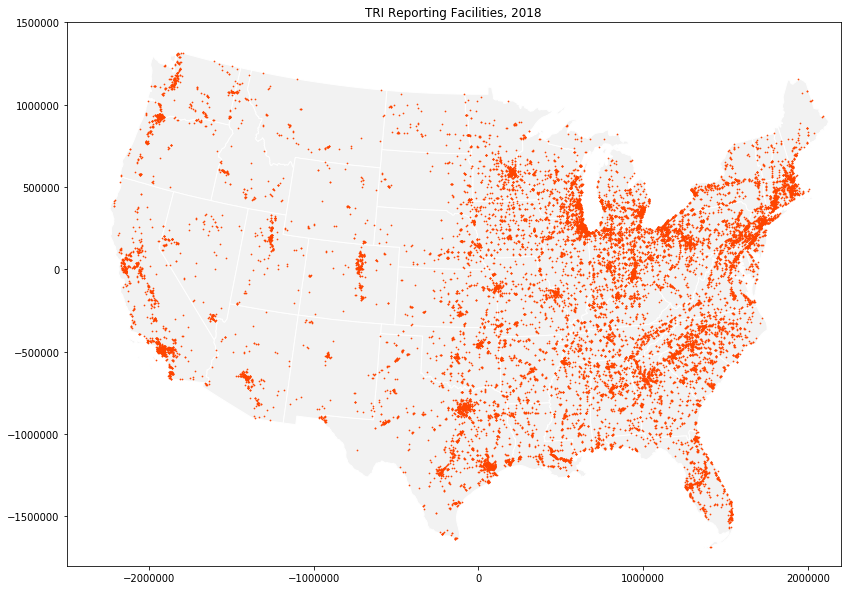

In [49]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
gdf_equal = gdf.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
gdf_equal.plot(ax=ax, color='orangered', zorder=1, markersize=.5);



ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='TRI Reporting Facilities, 2018');

print

In [151]:
# export TRI facilities to geojson
gdf.to_file("../data/TRI-facilities.geojson", driver='GeoJSON')

### Filter TRI facilities that release chemicals by water or land

In [50]:
# print column names to inspect
list(gdf.columns)

['TRIFD',
 'YEAR',
 'FACILITY NAME',
 'STREET ADDRESS',
 'CITY',
 'COUNTY',
 'ST',
 'ZIP',
 'BIA',
 'TRIBE',
 'LATITUDE',
 'LONGITUDE',
 'FEDERAL FACILITY',
 'INDUSTRY SECTOR',
 'CHEMICAL',
 'PARENT CO NAME',
 'WATER_RELEASE_GRAMS',
 'AIR_RELEASE_GRAMS',
 'LAND_RELEASE_GRAMS',
 'LAND_RELEASE_EXCLUDED_GRAMS',
 'ON_SITE_RELEASE_TOTAL_GRAMS',
 'OFF_SITE_RELEASE_TOTAL_GRAMS',
 'TOTAL_RELEASES_GRAMS',
 'WATER_RELEASE_LBS',
 'AIR_RELEASE_LBS',
 'LAND_RELEASE_LBS',
 'LAND_RELEASE_EXCLUDED_LBS',
 'ON_SITE_RELEASE_TOTAL_LBS',
 'OFF_SITE_RELEASE_TOTAL_LBS',
 'TOTAL_RELEASES_LBS',
 'WATER_RELEASE_PBTs',
 'AIR_RELEASE_PBTs',
 'LAND_RELEASE_PBTs',
 'LAND_RELEASE_EXCLUDED_PBTs',
 'ON_SITE_RELEASE_TOTAL_PBTs',
 'OFF_SITE_RELEASE_TOTAL_PBTs',
 'TOTAL_RELEASES_PBTs',
 'WATER_RELEASE_CARCINOGEN',
 'AIR_RELEASE_CARCINOGEN',
 'LAND_RELEASE_CARCINOGEN',
 'LAND_RELEASE_EXCLUDED_CARCINOGEN',
 'ON_SITE_RELEASE_TOTAL_CARCINOGEN',
 'OFF_SITE_RELEASE_TOTAL_CARCINOGEN',
 'TOTAL_RELEASES_CARCINOGEN',
 'geometry']

In [52]:
# filter facilities that release chemical into water or land
water_land_tri = gdf[(gdf['WATER_RELEASE_GRAMS'] > 0) | (gdf['WATER_RELEASE_LBS'] > 0) | (gdf['LAND_RELEASE_LBS'] > 0) | (gdf['LAND_RELEASE_GRAMS'] > 0)]
water_land_tri.head()

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,PARENT CO NAME,WATER_RELEASE_GRAMS,AIR_RELEASE_GRAMS,LAND_RELEASE_GRAMS,LAND_RELEASE_EXCLUDED_GRAMS,ON_SITE_RELEASE_TOTAL_GRAMS,OFF_SITE_RELEASE_TOTAL_GRAMS,TOTAL_RELEASES_GRAMS,WATER_RELEASE_LBS,AIR_RELEASE_LBS,LAND_RELEASE_LBS,LAND_RELEASE_EXCLUDED_LBS,ON_SITE_RELEASE_TOTAL_LBS,OFF_SITE_RELEASE_TOTAL_LBS,TOTAL_RELEASES_LBS,WATER_RELEASE_PBTs,AIR_RELEASE_PBTs,LAND_RELEASE_PBTs,LAND_RELEASE_EXCLUDED_PBTs,ON_SITE_RELEASE_TOTAL_PBTs,OFF_SITE_RELEASE_TOTAL_PBTs,TOTAL_RELEASES_PBTs,WATER_RELEASE_CARCINOGEN,AIR_RELEASE_CARCINOGEN,LAND_RELEASE_CARCINOGEN,LAND_RELEASE_EXCLUDED_CARCINOGEN,ON_SITE_RELEASE_TOTAL_CARCINOGEN,OFF_SITE_RELEASE_TOTAL_CARCINOGEN,TOTAL_RELEASES_CARCINOGEN,geometry
45,00705TRCSNRD14K,2018,TO-RICOS LTD,RD 14 KM 48 BO ASOMANTE,AIBONITO,AIBONITO,PR,705,,,18.12953,-66.28087,NO,Food,"PERACETIC ACID, NITRATE COMPOUNDS",PILGRIMS PRIDE CORP,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,9880.00000,9880.00000,9880.00000,51553.00000,61433.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-66.28087 18.12953)
58,0073WLLDWSBARAM,2018,ALLIED WASTE OF PONCE,BARAMAYA AVENUE - PR 500 - COTORRA WARD,PONCE,PONCE,PR,732,,,18.00226,-66.64132,NO,Hazardous Waste,ASBESTOS (FRIABLE),REPUBLIC SERVICES INC.,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,3990680.00000,3990680.00000,3990680.00000,0.00000,3990680.00000,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,3990680.00000,3990680.00000,3990680.00000,0.00000,3990680.00000,POINT (-66.64132 18.00226)
61,00751PRPGRPRO3K,2018,PREPA - AGUIRRE POWER GENERATI ON COMPLEX,PR-03 KM 152.7 BO. MONTESORRIA AGUIRRE,AGUIRRE,SALINAS,PR,704,,,17.94930,-66.23170,NO,Electric Utilities,"SULFURIC ACID (1994 AND AFTER ACID AEROSOLS"" ONLY)"", NAPHTHALENE, HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS"" ONLY)"", BENZO(G,H,I)PERYLENE, POLYCYCLIC AROMATIC COMPOUNDS, LEAD and LEAD COMPOUNDS",PUERTO RICO ELECTRIC POWER AUTHORITY,nan,nan,nan,nan,nan,nan,nan,3.03000,339553.05000,0.00000,0.00000,339556.08000,42.80000,339598.88000,2.89000,406.05000,0.00000,0.00000,408.94000,42.80000,451.74000,0.45000,463.50000,0.00000,0.00000,463.95000,0.00000,463.95000,POINT (-66.23170 17.94930)
62,00751SRMYNRAD1I,2018,US ARMY NATIONAL GUARD CAMP SANTIAGO TRAINING CENTER-RANGES,ROAD # 1 INT ROAD #154,SALINAS,SALINAS,PR,751,,,18.01200,-66.29690,YES,Other,LEAD,US DEPARTMENT OF DEFENSE,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,3775.90000,3775.90000,3775.90000,0.00000,3775.90000,0.00000,0.00000,3775.90000,3775.90000,3775.90000,0.00000,3775.90000,0.00000,0.00000,3775.90000,3775.90000,3775.90000,0.00000,3775.90000,POINT (-66.29690 18.01200)
70,00771BDLSPPBX27,2018,ASPEN SURGICAL PR CORP,ROAD 183 KM 20.3,LAS PIEDRAS,LAS PIEDRAS,PR,771,,,18.17800,-65.87420,NO,Miscellaneous Manufacturing,"AMMONIA, CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED IN THE TRANSVAAL REGION)",ASPEN SURGICAL,nan,nan,nan,nan,nan,nan,nan,0.00000,0.00000,1604.00000,1604.00000,1604.00000,0.00000,1604.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (-65.87420 18.17800)


In [53]:
# write to file
water_land_tri.to_file("../data/water_land_tri.geojson", driver='GeoJSON')

### Look at parent companies of TRI facilities

In [91]:
# find value counts of parent companies to find top companies
comp = gdf['PARENT CO NAME'].value_counts().rename_axis('parentCompany').reset_index(name='count')

# set option to view all results in display window
pd.set_option('display.max_rows', None)

comp

,parentCompany,count
0,,5168
1,US DEPARTMENT OF DEFENSE,268
2,BERKSHIRE HATHAWAY INC,191
3,CEMEX INC,171
4,ARGOS USA CORP,164
5,KOCH INDUSTRIES INC,139
6,CRH AMERICAS INC,128
7,CLEAN HARBORS INC,115
8,TYSON FOODS INC,112
9,MARATHON PETROLEUM CORP,90


In [92]:
# drop first row which is the sum of all facilities that didn't report a parent company
comp = comp.drop(comp.index[0]).reset_index()
comp = comp.drop(['index'], axis=1)
comp

,parentCompany,count
0,US DEPARTMENT OF DEFENSE,268
1,BERKSHIRE HATHAWAY INC,191
2,CEMEX INC,171
3,ARGOS USA CORP,164
4,KOCH INDUSTRIES INC,139
5,CRH AMERICAS INC,128
6,CLEAN HARBORS INC,115
7,TYSON FOODS INC,112
8,MARATHON PETROLEUM CORP,90
9,MARTIN MARIETTA MATERIALS INC,90


In [99]:
# find natural breaks in data to pick out companies with the most facilities
# testing different numbers of classes
breaks3 = jenkspy.jenks_breaks(comp['count'], nb_class=3)
print(breaks3)

breaks4 = jenkspy.jenks_breaks(comp['count'], nb_class=4)
print(breaks4)

breaks5 = jenkspy.jenks_breaks(comp['count'], nb_class=5)
print(breaks5)


[1.0, 21.0, 90.0, 268.0]
[1.0, 7.0, 31.0, 90.0, 268.0]
[1.0, 7.0, 29.0, 73.0, 139.0, 268.0]
[1.0, 38.0, 268.0]


The data breaks at 90 facilities when I classify using both 3 and 4 classes. This includes 10 companies.

In [100]:
top10 = comp.head(10)
top10

,parentCompany,count
0,US DEPARTMENT OF DEFENSE,268
1,BERKSHIRE HATHAWAY INC,191
2,CEMEX INC,171
3,ARGOS USA CORP,164
4,KOCH INDUSTRIES INC,139
5,CRH AMERICAS INC,128
6,CLEAN HARBORS INC,115
7,TYSON FOODS INC,112
8,MARATHON PETROLEUM CORP,90
9,MARTIN MARIETTA MATERIALS INC,90


After finding the top 10 parent companies, I created a csv file containing:
- company name
- address of headquarter
- number of facilities owned
- industry
- and a brief description of each company

Addresses and company information were obtained through google maps and Bloomberg Company Profiles. I was unable to find the exact address for Cemex Inc, only that the company was headquartered in San Pedro Garza García, Mexico. An address was chosen from the centroid of the country to represent Cemex Inc's headquarters.

In [157]:
# read in company info
companies = pd.read_csv('../data/parent-companies.csv', encoding='latin-1')
companies

,parentCompany,count,address,industry,description
0,US Department Of Defense,268,"100 S Washington Blvd, Arlington VA 22202",NaN,The United States Department of Defense is an executive branch department of the federal government charged with coordinating and supervising all agencies and functions of the government directly related to national security and the United States Armed Forces.
1,Berkshire Hathaway Inc,191,"3555 Farnam Street Omaha, NE 68131",NaN,Berkshire Hathaway is an American multinational conglomerate holding company.
2,Cemex Inc,171,"66220 San Pedro Garza García, Nuevo Leon, Mexico",Construction Materials-Cement & Aggregates,Cemex Inc. manufactures cement and ready-mixed concrete. It operates portland cement manufacturing plants and has a network of cement distribution terminals in the United States.
3,Argos Usa Corp,164,"3015 Windward Plaza, Alpharetta, GA 30005 United States",Construction Materials-Cement & Aggregates,"Argos USA LLC produces and distributes cements and aggregates. It offers portland cement, masonry, block, and ready mix concrete."
4,Koch Industries Inc,139,"2256 Wichita, KS 67201 United States","Oil, Gas & Coal","Koch Industries, Inc. operates as a diversified holding company. It focuses on renewable fuels, polymers and fibers, minerals, ranching, fertilizers, refining and chemicals, and consumer products business."
5,Crh Americas Inc,128,"900 Ashwood Pkwy, Dunwoody, GA 30338",Construction Materials-Cement & Aggregates,"CRH America, Inc. provides construction materials. It offers aggregates, asphalt, cement, and readymixed concrete products."
6,Clean Harbors Inc,115,"42 Longwater Drive Norwell, MA 02061 United States",Waste Management,"Clean Harbors Environmental Services, Inc. provides hazardous and non-hazardous material management and disposal services. It offers waste disposal and recycling, emergency response, chemical packaging, and field, industrial, oilfield, exploration, lodging, and in-site services."
7,Tyson Foods Inc,112,"2200 West Don Tyson Parkway Springdale, AR 72762 United States",Consumer Products-Packaged Food,"Tyson Foods, Inc. produces, distributes, and markets chicken, beef, pork, prepared foods, and related allied products. It's products are marketed and sold to national and regional grocery retailers, regional grocery wholesalers, meat distributors, warehouse club stores, military commissaries, and industrial food processing companies."
8,Marathon Petroleum Corp,90,"539 South Main Street Findlay, OH 45840 United States","Oil, Gas & Coal","Marathon Petroleum Corporation operates as a crude oil refining company. It refines, supplies, markets, and transports petroleum products."
9,Martin Marietta Materials Inc,90,"2710 Wycliff Road Raleigh, NC 27607 United States",Construction Materials-Cement & Aggregates,"Martin Marietta Materials, Inc. produces aggregates for the construction industry, including highways, infrastructure, commercial, and residential. It also manufactures and markets magnesia-based products, including heat-resistant refractory products for the steel industry, chemical products for industrial and environmental uses, and dolomitic lime."


In [158]:
# geocode addresses, assigning lat/long values to new columns
from geopy import Nominatim

geolocator = Nominatim()

# iterate over rows
for index, row in companies.iterrows():
    location = geolocator.geocode(row['address']) # geocode address
    companies.loc[index,'latitude'] = location.latitude # create latitude column
    companies.loc[index,'longitude'] = location.longitude # create longitude column

companies

,parentCompany,count,address,industry,description,latitude,longitude
0,US Department Of Defense,268,"100 S Washington Blvd, Arlington VA 22202",NaN,The United States Department of Defense is an executive branch department of the federal government charged with coordinating and supervising all agencies and functions of the government directly related to national security and the United States Armed Forces.,38.86592,-77.07329
1,Berkshire Hathaway Inc,191,"3555 Farnam Street Omaha, NE 68131",NaN,Berkshire Hathaway is an American multinational conglomerate holding company.,41.25741,-95.96539
2,Cemex Inc,171,"66220 San Pedro Garza García, Nuevo Leon, Mexico",Construction Materials-Cement & Aggregates,Cemex Inc. manufactures cement and ready-mixed concrete. It operates portland cement manufacturing plants and has a network of cement distribution terminals in the United States.,25.65763,-100.36676
3,Argos Usa Corp,164,"3015 Windward Plaza, Alpharetta, GA 30005 United States",Construction Materials-Cement & Aggregates,"Argos USA LLC produces and distributes cements and aggregates. It offers portland cement, masonry, block, and ready mix concrete.",34.09330,-84.23949
4,Koch Industries Inc,139,"2256 Wichita, KS 67201 United States","Oil, Gas & Coal","Koch Industries, Inc. operates as a diversified holding company. It focuses on renewable fuels, polymers and fibers, minerals, ranching, fertilizers, refining and chemicals, and consumer products business.",37.69224,-97.33754
5,Crh Americas Inc,128,"900 Ashwood Pkwy, Dunwoody, GA 30338",Construction Materials-Cement & Aggregates,"CRH America, Inc. provides construction materials. It offers aggregates, asphalt, cement, and readymixed concrete products.",33.93227,-84.34037
6,Clean Harbors Inc,115,"42 Longwater Drive Norwell, MA 02061 United States",Waste Management,"Clean Harbors Environmental Services, Inc. provides hazardous and non-hazardous material management and disposal services. It offers waste disposal and recycling, emergency response, chemical packaging, and field, industrial, oilfield, exploration, lodging, and in-site services.",42.16065,-70.88407
7,Tyson Foods Inc,112,"2200 West Don Tyson Parkway Springdale, AR 72762 United States",Consumer Products-Packaged Food,"Tyson Foods, Inc. produces, distributes, and markets chicken, beef, pork, prepared foods, and related allied products. It's products are marketed and sold to national and regional grocery retailers, regional grocery wholesalers, meat distributors, warehouse club stores, military commissaries, and industrial food processing companies.",36.15443,-94.15423
8,Marathon Petroleum Corp,90,"539 South Main Street Findlay, OH 45840 United States","Oil, Gas & Coal","Marathon Petroleum Corporation operates as a crude oil refining company. It refines, supplies, markets, and transports petroleum products.",41.03625,-83.65016
9,Martin Marietta Materials Inc,90,"2710 Wycliff Road Raleigh, NC 27607 United States",Construction Materials-Cement & Aggregates,"Martin Marietta Materials, Inc. produces aggregates for the construction industry, including highways, infrastructure, commercial, and residential. It also manufactures and markets magnesia-based products, including heat-resistant refractory products for the steel industry, chemical products for industrial and environmental uses, and dolomitic lime.",35.81951,-78.69114


In [161]:
# convert dataframe to geodataframe
gdf = gpd.GeoDataFrame(companies, geometry=gpd.points_from_xy(companies.longitude, companies.latitude))

# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

# write to file
gdf.to_file('../data/parent-companies.geojson', driver='GeoJSON')